In [1]:
import sys, os
sys.path.append("C:\\Program Files\\Lumerical\\v231\\api\\python\\")
import lumapi
# sys.path.append(os.path.dirname(__file__))
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use("../../mplstyle.mplstyle")
from tqdm import tqdm

## C-band Refractive Index

In [2]:
um = 1e-6
width_sweep = np.linspace(0.1*um,2.0*um,num=50)
height = 0.22*um

def find_modes(width,height,wl=1.55e-6,hide=True):
    mode1 = lumapi.MODE(filename="rib_waveguide.lms",hide=hide)
    mode1.switchtolayout()
    mode1.select("silicon")
    mode1.set("x span",width)
    mode1.set("y span",height)

    mode1.setanalysis("wavelength",wl);
    mode1.findmodes()
    returnable = {}
    #Store the data from the first four modes
    for i in range(1,10):
        mode1.selectmode(i)
        neff = mode1.getdata(f"FDE::data::mode{i}","neff")
        ng = mode1.getdata(f"FDE::data::mode{i}","ng")
        pol_frac = mode1.getdata(f"FDE::data::mode{i}","TE polarization fraction")
        effective_area = mode1.getdata(f"FDE::data::mode{i}","mode effective area")

        returnable["mode"+str(i)] = {
            "neff":np.squeeze(neff),
            "ng":np.squeeze(ng),
            "TE pol fraction":pol_frac,
            "effective area":effective_area,
            "wavelength":wl,
            "width":width
        }
    mode1.switchtolayout()
    mode1.close()
    return returnable

storage = []
for w in tqdm(width_sweep,desc='width_sweep'):
    storage.append(find_modes(width=w,height=height,wl=1.55e-6))

width_sweep: 100%|██████████| 50/50 [19:43<00:00, 23.67s/it]


In [3]:
# Post-process the data
TE0_mode_data = []
TM0_mode_data = []
TE1_mode_data = []
TM1_mode_data = []

area_cutoff = 5e-12
pol_cutoff = 0.5
for index,value in enumerate(storage):
    TE_temp = []
    TM_temp = []
    for i in range(1,10):
        if value[f'mode{i}']['effective area'] < area_cutoff and value[f'mode{i}']['TE pol fraction'] > pol_cutoff:
            TE_temp.append(value[f'mode{i}'])
        if value[f'mode{i}']['effective area'] < area_cutoff and value[f'mode{i}']['TE pol fraction'] < pol_cutoff:
            TM_temp.append(value[f'mode{i}'])

    #Sort list by attribute neff
    TE_temp.sort(key=lambda x: x['neff'], reverse=True)
    TM_temp.sort(key=lambda x: x['neff'], reverse=True)
    if len(TE_temp) == 0:
        pass
    elif len(TE_temp) == 1:
        TE0_mode_data.append(TE_temp[0])
    else:
        TE0_mode_data.append(TE_temp[0])
        TE1_mode_data.append(TE_temp[1])

    if len(TM_temp) == 0:
        pass
    elif len(TM_temp) == 1:
        TM0_mode_data.append(TM_temp[0])
    else:
        TM0_mode_data.append(TM_temp[0])
        TM1_mode_data.append(TM_temp[1])

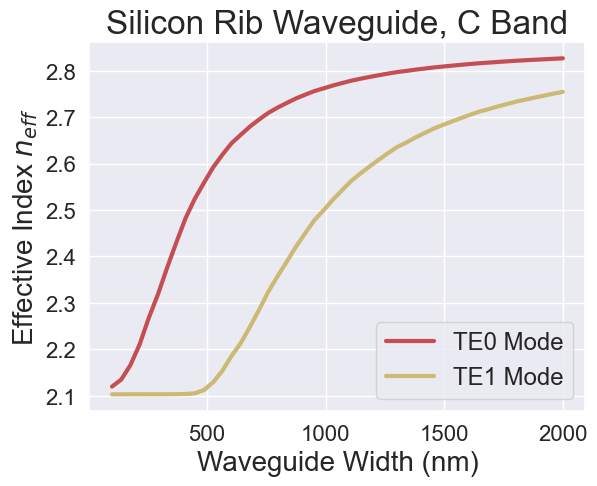

In [4]:
plt.figure()
plt.plot([i['width']*1e9 for i in TE0_mode_data],[np.real(i['neff']) for i in TE0_mode_data],c='r')
plt.plot([i['width']*1e9 for i in TE1_mode_data],[np.real(i['neff']) for i in TE1_mode_data],c='y')
plt.xlabel("Waveguide Width (nm)")
plt.ylabel("Effective Index " + r"$n_{eff}$")
plt.title("Silicon Rib Waveguide, C Band")
plt.legend([
    "TE0 Mode",
    "TE1 Mode",
])
plt.show()

In [5]:
# Save the data
import pickle

storage_dict = {
    "TE0":TE0_mode_data,
    "TE1":TE1_mode_data,
    "TM0":[],
    "TM1":[],
}

with open("Si_rib_C_band.pkl",'wb') as f:
    pickle.dump(storage_dict,f)

## O-band Refractive Index

In [6]:
um = 1e-6
width_sweep = np.linspace(0.1*um,2.0*um,num=50)
height = 0.22*um

storage = []
for w in tqdm(width_sweep,desc='width_sweep'):
    storage.append(find_modes(width=w,height=height,wl=1.31e-6))

width_sweep: 100%|██████████| 50/50 [19:53<00:00, 23.86s/it]


In [7]:
# Post-process the data
TE0_mode_data = []
TM0_mode_data = []
TE1_mode_data = []
TM1_mode_data = []

area_cutoff = 10e-12
pol_cutoff = 0.5
for index,value in enumerate(storage):
    TE_temp = []
    TM_temp = []
    for i in range(1,10):
        if value[f'mode{i}']['effective area'] < area_cutoff and value[f'mode{i}']['TE pol fraction'] > pol_cutoff:
            TE_temp.append(value[f'mode{i}'])
        if value[f'mode{i}']['effective area'] < area_cutoff and value[f'mode{i}']['TE pol fraction'] < pol_cutoff:
            TM_temp.append(value[f'mode{i}'])

    #Sort list by attribute neff
    TE_temp.sort(key=lambda x: x['neff'], reverse=True)
    TM_temp.sort(key=lambda x: x['neff'], reverse=True)
    if len(TE_temp) == 0:
        pass
    elif len(TE_temp) == 1:
        TE0_mode_data.append(TE_temp[0])
    else:
        TE0_mode_data.append(TE_temp[0])
        TE1_mode_data.append(TE_temp[1])

    if len(TM_temp) == 0:
        pass
    elif len(TM_temp) == 1:
        TM0_mode_data.append(TM_temp[0])
    else:
        TM0_mode_data.append(TM_temp[0])
        TM1_mode_data.append(TM_temp[1])

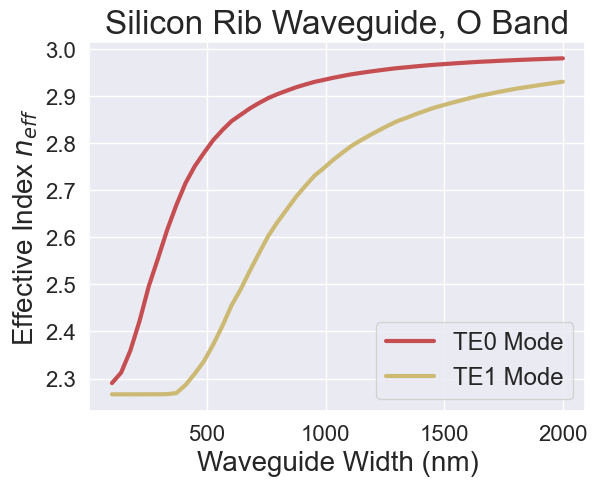

In [8]:
plt.figure()
plt.plot([i['width']*1e9 for i in TE0_mode_data],[np.real(i['neff']) for i in TE0_mode_data],c='r')
plt.plot([i['width']*1e9 for i in TE1_mode_data],[np.real(i['neff']) for i in TE1_mode_data],c='y')
plt.xlabel("Waveguide Width (nm)")
plt.ylabel("Effective Index " + r"$n_{eff}$")
plt.title("Silicon Rib Waveguide, O Band")
plt.legend([
    "TE0 Mode",
    "TE1 Mode",
])
plt.show()

In [9]:
# Save the data
import pickle

storage_dict = {
    "TE0":TE0_mode_data,
    "TE1":TE1_mode_data,
    "TM0":[],
    "TM1":[],
}

with open("Si_rib_O_band.pkl",'wb') as f:
    pickle.dump(storage_dict,f)